In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import imageio
from skimage.transform import rescale
from scipy import signal
import h5py
import pickle

In [3]:
run -im djd.main -- --dbname=dj_lisa --r

For remote access to work, make sure to first open an SSH tunnel with MySQL
port forwarding. Run the `djdtunnel` script in a separate terminal, with
optional `--user` argument if your local and remote user names differ.
Or, open the tunnel manually with:
  ssh -NL 3306:huxley.neuro.bzm:3306 -p 1021 USERNAME@tunnel.bio.lmu.de
Connecting execute@localhost:3306
Connected to database 'dj_lisa' as 'execute@10.153.172.3'
For remote file access to work, make sure to first mount the filesystem at tunnel.bio.lmu.de:1021 via SSH


In [5]:
mou = 'Ntsr1Cre_2019_0008'

I want to analyze data of series that have hmov and noise stimulus:

In [7]:
e & {'m':mou, 'e_name':'ASparseNoise5_60deg'}

m strain acronym + counter,s Series number,e Experiment number,e_name experiment name,e_optowl wavelength of optogenetic light stimulation,"e_optoampl amplitude of optogenetic light stimulation, AU","e_displayazim display azimuth wrt to snout, deg","e_displayelev display elevation wrt snout, default is 0, deg",e_notes notes
Ntsr1Cre_2019_0008,3,3,ASparseNoise5_60deg,nan,nan,45.0,10.204,"x, y = 0, 0, pretty sleepy, should be stable eye position, good RF progression"
Ntsr1Cre_2019_0008,4,3,ASparseNoise5_60deg,nan,nan,55.0,0.0,"x, y = 0, 0, air puff t=6:15, t=9:00, t=17:15"
Ntsr1Cre_2019_0008,5,3,ASparseNoise5_60deg,nan,nan,55.0,0.0,"x, y = 0, 0, good RFs"
Ntsr1Cre_2019_0008,6,3,ASparseNoise5_60deg,nan,nan,40.0,10.204,"x, y = 0, 0, air puff t=15:15"
Ntsr1Cre_2019_0008,7,3,ASparseNoise5_60deg,nan,nan,38.0,0.0,"x, y = 0, 0, lots of air puffs, OK RFs, eyes may have been a bit too closed some of the time"
Ntsr1Cre_2019_0008,8,3,ASparseNoise5_60deg,nan,nan,38.0,0.0,"x, y = 0, 0, air puff t=4:00, t=11:45, good RFs"


In [9]:
e & {'m':mou, 'e_name':'hollymov_opto_3'}

m strain acronym + counter,s Series number,e Experiment number,e_name experiment name,e_optowl wavelength of optogenetic light stimulation,"e_optoampl amplitude of optogenetic light stimulation, AU","e_displayazim display azimuth wrt to snout, deg","e_displayelev display elevation wrt snout, default is 0, deg",e_notes notes
Ntsr1Cre_2019_0008,3,7,hollymov_opto_3,470.0,10.0,45.0,10.204,"107.73 deg (oops, should have been set to 106 deg), gamma correction left on (oops), 1 s opto pulses, 32 min, lots of running"
Ntsr1Cre_2019_0008,5,8,hollymov_opto_3,470.0,13.0,55.0,0.0,"107.73 deg (oops, should have been set to 106 deg), gamma off, 1 s opto pulses, 32 min"
Ntsr1Cre_2019_0008,6,6,hollymov_opto_3,470.0,14.0,40.0,10.204,"106 deg, gamma off, 1 s opto pulses, 32 min, air puff t=20:15, t=27:45"
Ntsr1Cre_2019_0008,7,6,hollymov_opto_3,470.0,14.0,38.0,0.0,"106 deg, gamma off, 1 s opto pulses, 32 min"


Series 7 and 8 are not yet spike sorted.

## Series 3

In [18]:
spk & {'m':mou, 's':3, 'e':3}

m strain acronym + counter,s Series number,e Experiment number,"u unit ID, from spyke","spk_times spike times relative to experiment start, s"
Ntsr1Cre_2019_0008,3,3,5,=BLOB=
Ntsr1Cre_2019_0008,3,3,6,=BLOB=
Ntsr1Cre_2019_0008,3,3,11,=BLOB=
Ntsr1Cre_2019_0008,3,3,14,=BLOB=
Ntsr1Cre_2019_0008,3,3,17,=BLOB=
Ntsr1Cre_2019_0008,3,3,18,=BLOB=
Ntsr1Cre_2019_0008,3,3,20,=BLOB=
Ntsr1Cre_2019_0008,3,3,22,=BLOB=
Ntsr1Cre_2019_0008,3,3,25,=BLOB=
Ntsr1Cre_2019_0008,3,3,26,=BLOB=


In [19]:
units = (spk & {'m':mou, 's':3, 'e':3}).fetch('u')

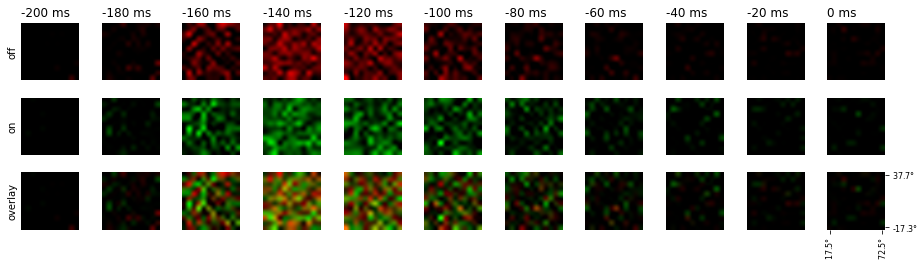

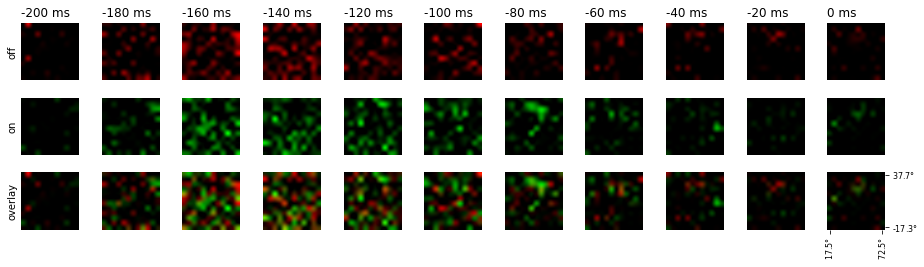

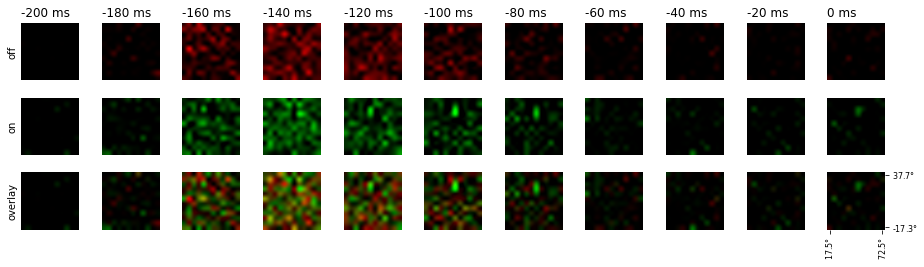

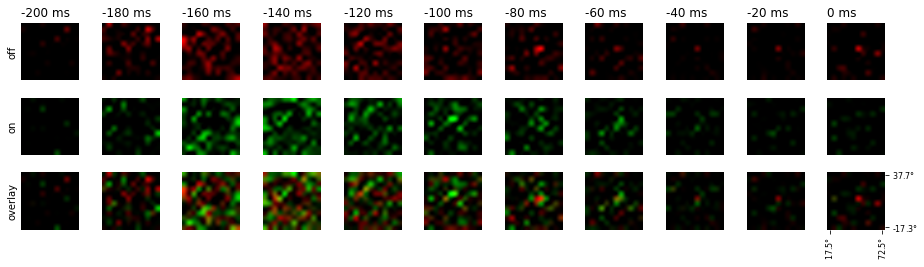

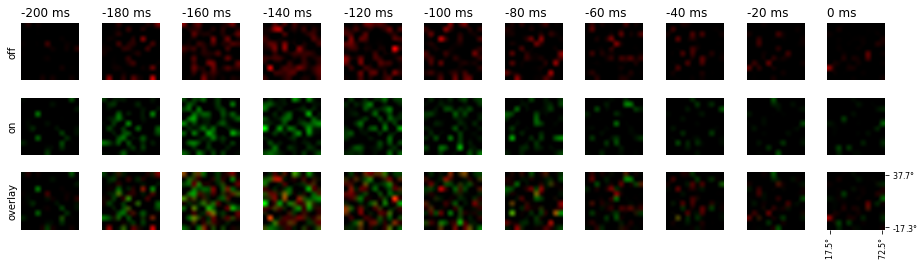

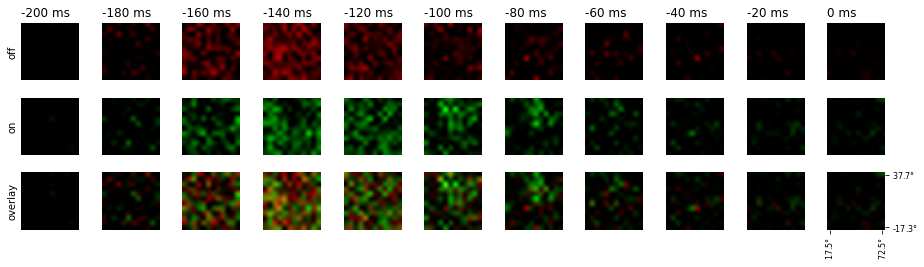

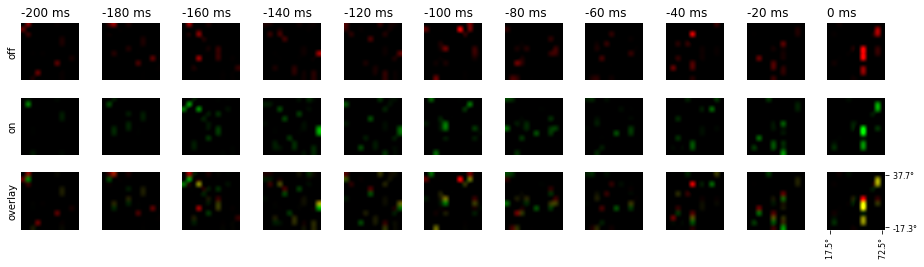

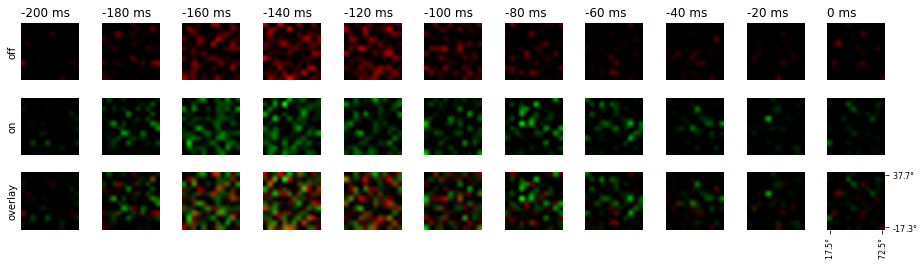

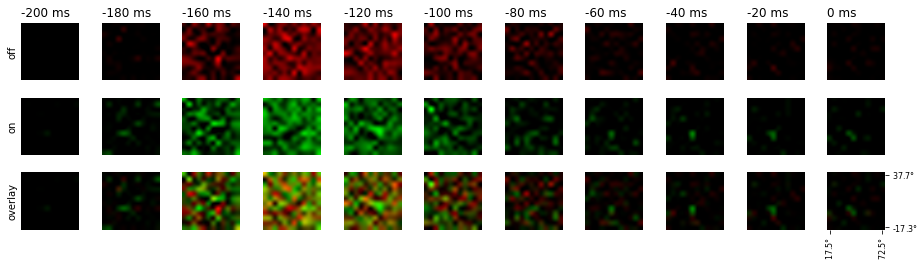

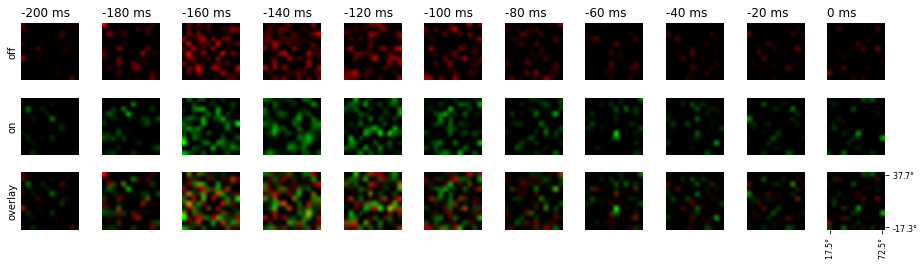

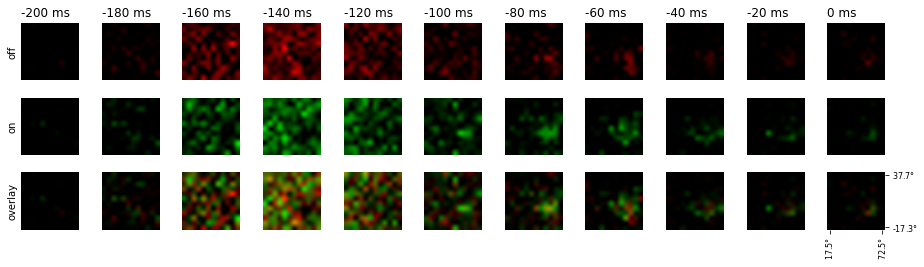

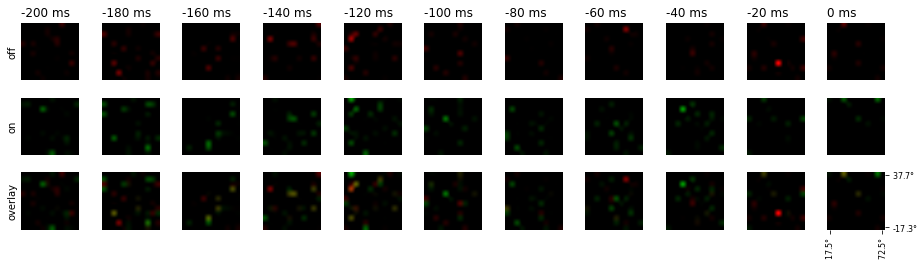

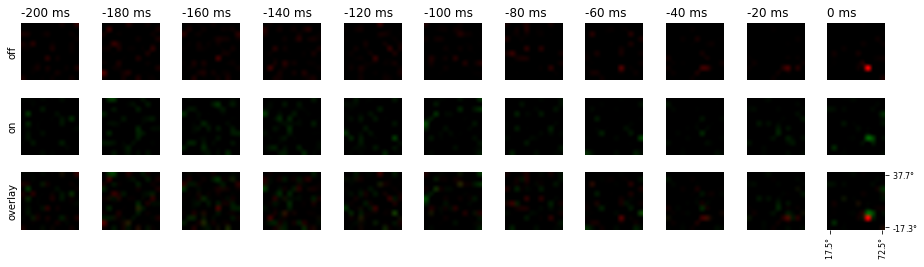

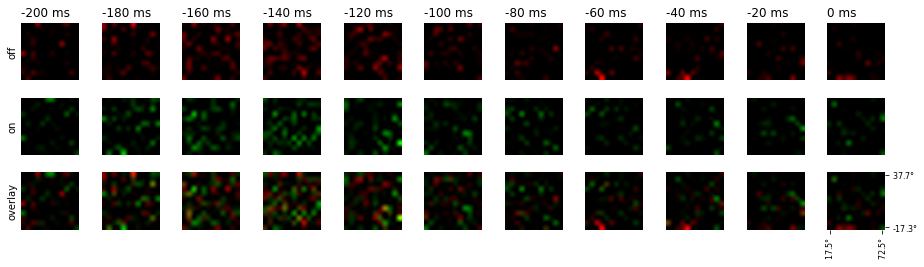

In [20]:
for unit in units:
    (spk & {'m':mou, 's':3, 'e':3, 'u':unit}).sta(tstart=-0.2, tstop=0.02, tres=0.02, precision=3, direction='spkta')

## Series 5

In [21]:
spk & {'m':mou, 's':5, 'e':3}

m strain acronym + counter,s Series number,e Experiment number,"u unit ID, from spyke","spk_times spike times relative to experiment start, s"
Ntsr1Cre_2019_0008,5,3,19,=BLOB=
Ntsr1Cre_2019_0008,5,3,21,=BLOB=
Ntsr1Cre_2019_0008,5,3,27,=BLOB=
Ntsr1Cre_2019_0008,5,3,48,=BLOB=
Ntsr1Cre_2019_0008,5,3,54,=BLOB=
Ntsr1Cre_2019_0008,5,3,58,=BLOB=


In [22]:
units = (spk & {'m':mou, 's':5, 'e':3}).fetch('u')

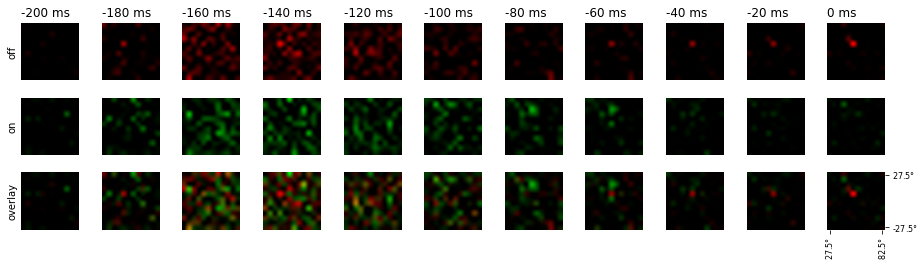

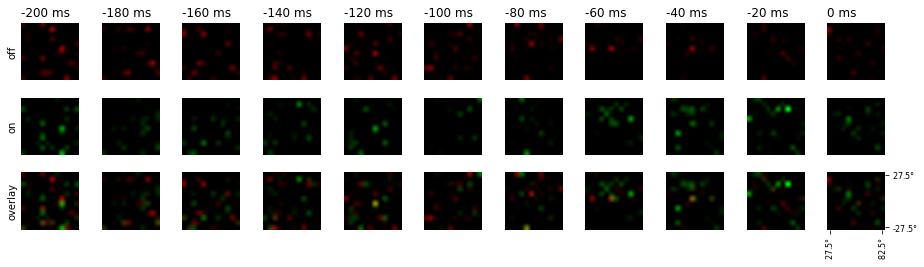

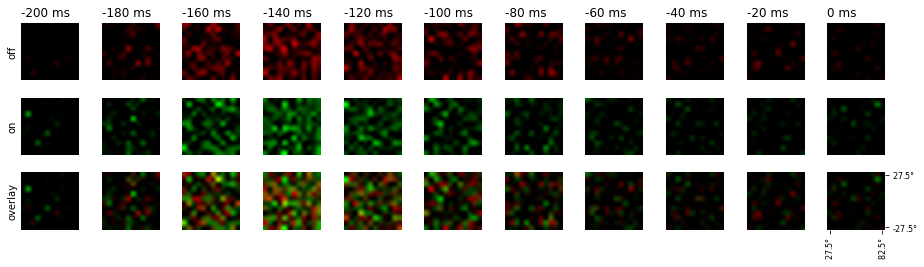

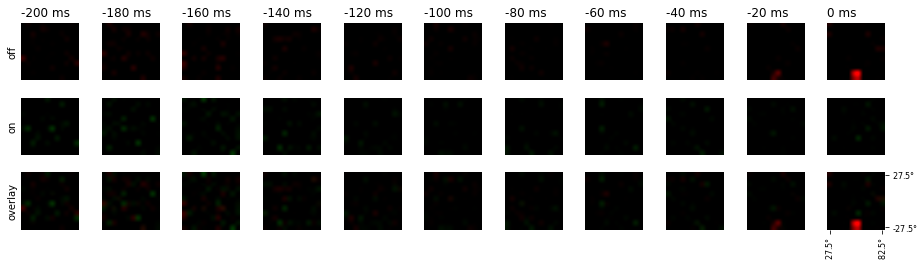

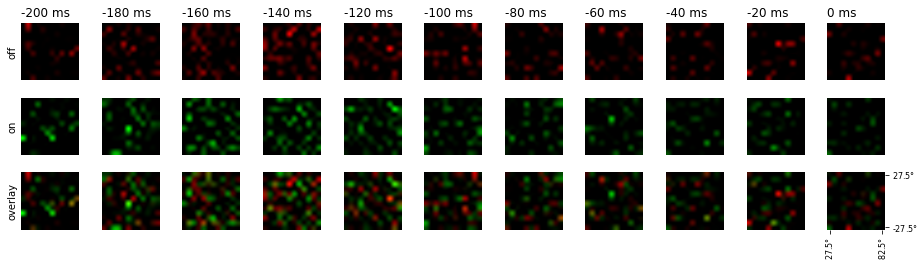

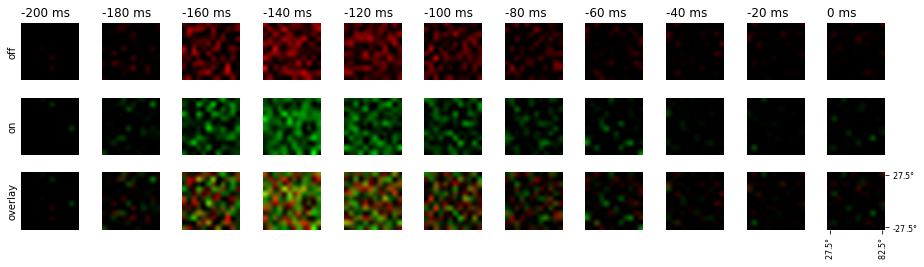

In [23]:
for unit in units:
    (spk & {'m':mou, 's':5, 'e':3, 'u':unit}).sta(tstart=-0.2, tstop=0.02, tres=0.02, precision=3, direction='spkta')

## Series 6

In [24]:
spk & {'m':mou, 's':6, 'e':3}

m strain acronym + counter,s Series number,e Experiment number,"u unit ID, from spyke","spk_times spike times relative to experiment start, s"
Ntsr1Cre_2019_0008,6,3,23,=BLOB=
Ntsr1Cre_2019_0008,6,3,30,=BLOB=
Ntsr1Cre_2019_0008,6,3,31,=BLOB=
Ntsr1Cre_2019_0008,6,3,35,=BLOB=
Ntsr1Cre_2019_0008,6,3,40,=BLOB=
Ntsr1Cre_2019_0008,6,3,46,=BLOB=
Ntsr1Cre_2019_0008,6,3,50,=BLOB=
Ntsr1Cre_2019_0008,6,3,51,=BLOB=


Unit 40, 50 and 51 give errors -> exclude them

In [25]:
units = [23, 30, 31, 35, 46]

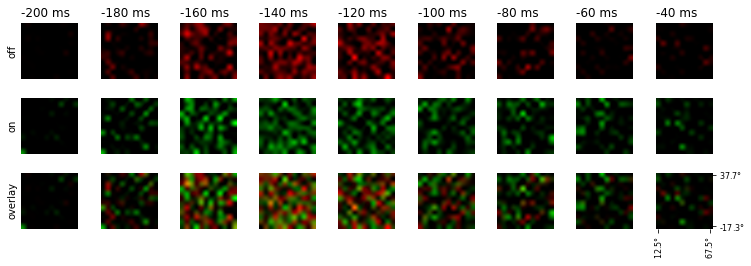

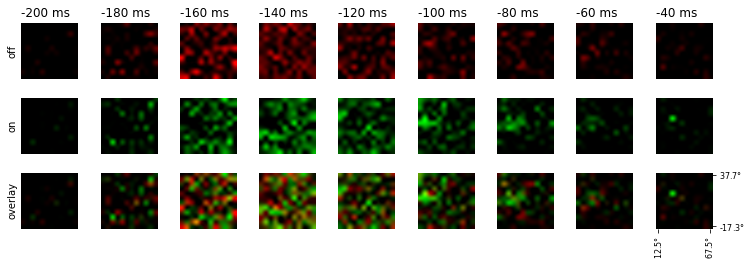

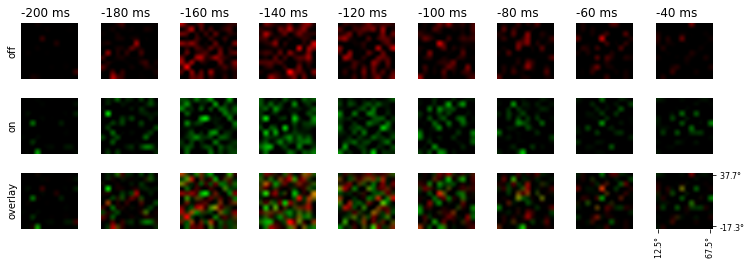

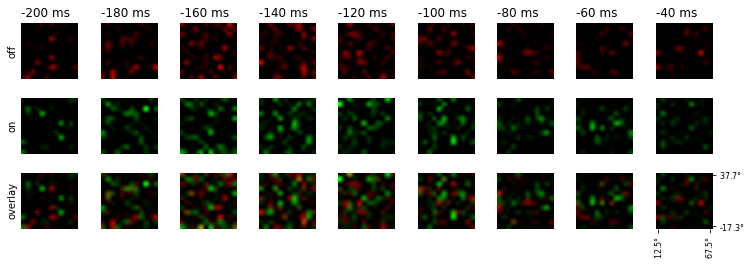

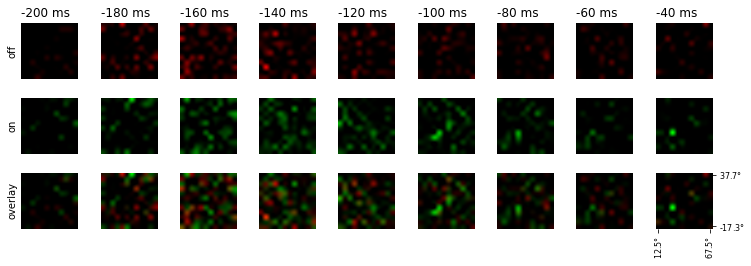

In [27]:
for unit in units:
   (spk & {'m':mou, 's':6, 'e':3, 'u':unit}).sta(tstart=-0.2, tstop=-0.02, tres=0.02, precision=3, direction='spkta')